In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import os

%matplotlib inline

In [2]:
monthly_01_20raw = pd.read_csv(r'datos_mes_01_20.csv')

monthly_01_20raw['FECHA'] = pd.to_datetime(monthly_01_20raw['FECHA'], format = '%Y-%m-%d')

monthly_01_20raw = monthly_01_20raw.set_index(['FECHA'])

In [3]:
monthly_df = monthly_01_20raw.groupby(['FECHA']).agg('mean')
monthly_df2 = monthly_df.resample('M').mean()

In [4]:
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 238 entries, 2001-01-31 to 2020-10-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BEN     238 non-null    float64
 1   NO_2    238 non-null    float64
 2   O_3     238 non-null    float64
 3   TCH     238 non-null    float64
dtypes: float64(4)
memory usage: 9.3 KB


In [5]:
prueba = monthly_df.loc[(monthly_df.index.year == 2018)]
prueba.head(20)

,BEN,NO_2,O_3,TCH
FECHA,,,,
2018-01-31,0.723118,48.689516,6.458065,1.317849
2018-02-28,0.660119,45.831845,6.189286,1.377857
2018-03-31,0.434946,29.513441,4.425806,1.320753
2018-04-30,0.395000,30.966667,4.563333,1.329444
2018-05-31,0.305914,29.341398,4.274194,1.355591
2018-06-30,0.230556,26.984722,4.610000,1.273778
2018-07-31,0.225806,27.477151,5.438710,1.363656
2018-08-31,0.210215,28.629032,5.096774,1.373118
2018-09-30,0.316111,37.727778,5.663333,1.399333


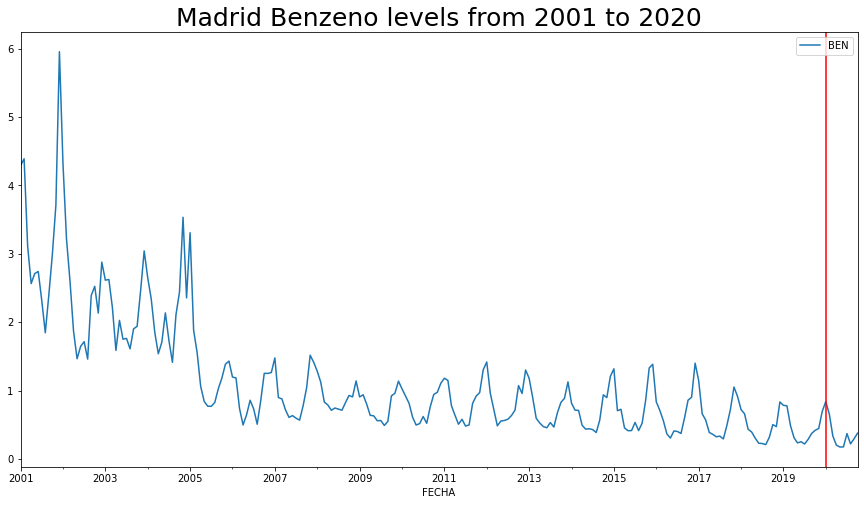

<Figure size 432x432 with 0 Axes>

In [26]:
col_list = ['BEN']
plt_monthly = monthly_df2[col_list]
plt_monthly.plot(figsize=(15, 8))
plt.title('Madrid Benzeno levels from 2001 to 2020', fontsize=25)
plt.legend(loc='upper right')
plt.axvline('2020', c='red')
plt.show()
plt.savefig('benzeno_levels_from_01_20.png');

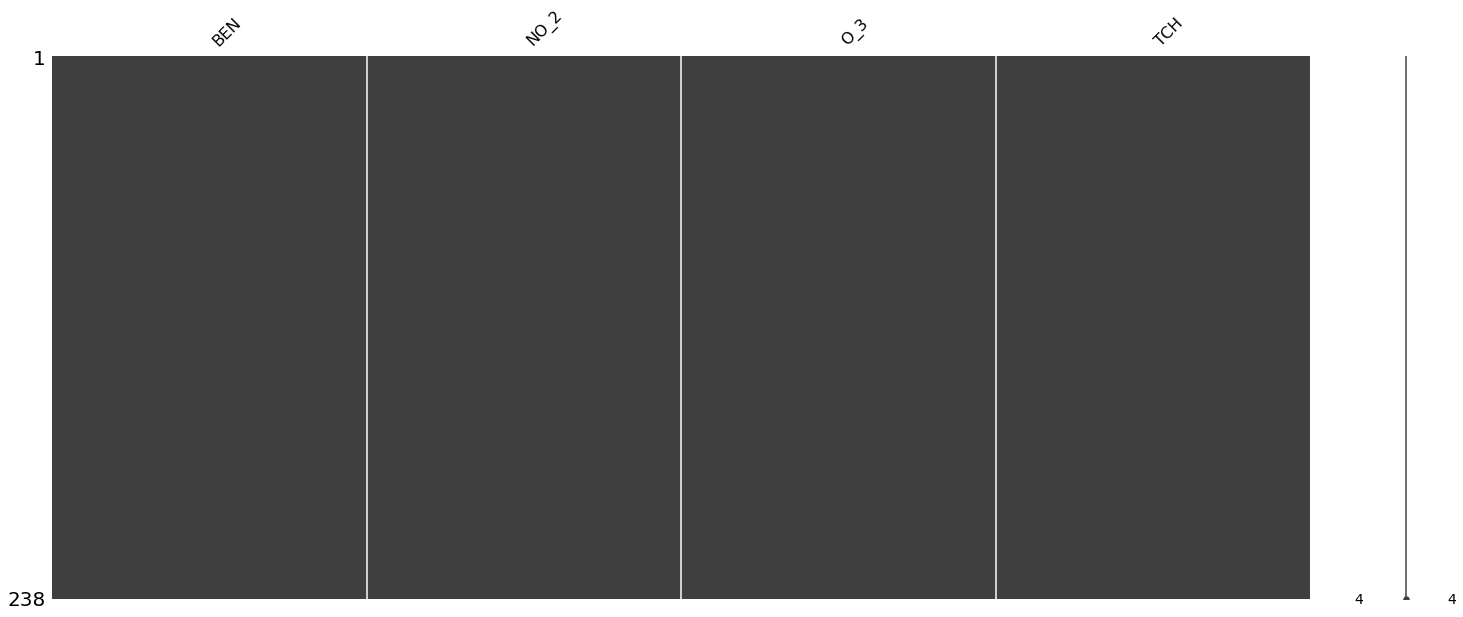

In [7]:
msno.matrix(monthly_01_20raw);

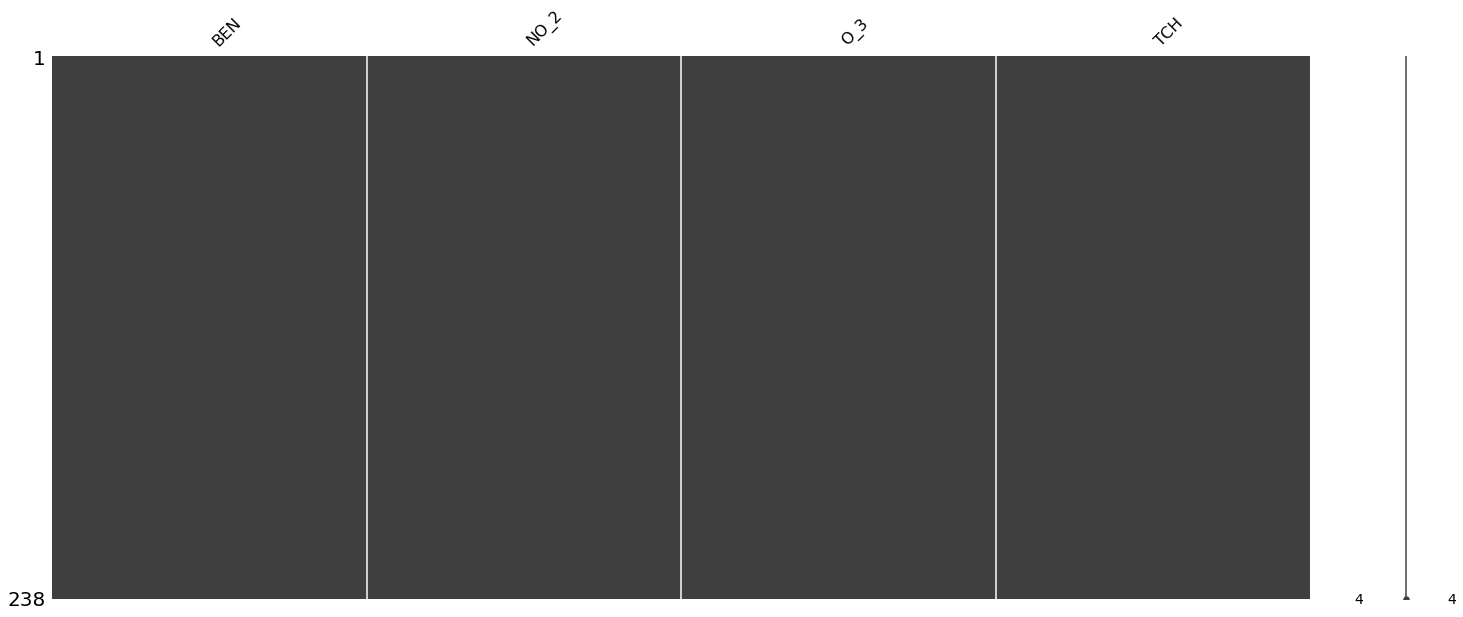

In [8]:
msno.matrix(monthly_df2);

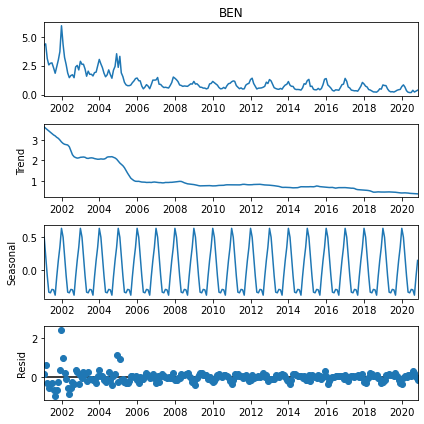

In [83]:
plt_monthly
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
result_mul = seasonal_decompose(plt_monthly['BEN'], model = 'multiplicative', extrapolate_trend = 'freq')

# Additive Decomposition

result_add = seasonal_decompose(plt_monthly['BEN'], model = 'additive', extrapolate_trend = 'freq')

# Plot
"""plt.rcParams.update({'figure.figsize': (6,6)})
print("--------Multiplicative-------")
result_mul.plot()
print("--------Additive-------")"""
result_add.plot()
plt.savefig('benzeno_decompose_01_20.png');
#plt.show()

In [27]:
from statsmodels.tsa.stattools import adfuller, kpss


def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    print('Null Hypothesis: Unit Root Present')
    print('Test Statistic < Critical Value => Reject Null')
    print('P-Value =< Alpha(.05) => Reject Null\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput[f'Critical Value {key}'] = value
    print (dfoutput, '\n')

In [28]:
adf_test(plt_monthly['BEN'])

Results of Dickey-Fuller Test:
Null Hypothesis: Unit Root Present
Test Statistic < Critical Value => Reject Null
P-Value =< Alpha(.05) => Reject Null

Test Statistic                -5.872591e+00
p-value                        3.214186e-07
#Lags Used                     1.100000e+01
Number of Observations Used    2.260000e+02
Critical Value 1%             -3.459620e+00
Critical Value 5%             -2.874415e+00
Critical Value 10%            -2.573632e+00
dtype: float64 



In [29]:
def kpss_test(timeseries, regression='c'):
    # Whether stationary around constant 'c' or trend 'ct
    print ('Results of KPSS Test:')
    print('Null Hypothesis: Data is Stationary/Trend Stationary')
    print('Test Statistic > Critical Value => Reject Null')
    print('P-Value =< Alpha(.05) => Reject Null\n')
    kpsstest = kpss(timeseries, regression=regression)
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output[f'Critical Value {key}'] = value
    print (kpss_output, '\n')

In [31]:
kpss_test(plt_monthly['BEN'], regression='c')

Results of KPSS Test:
Null Hypothesis: Data is Stationary/Trend Stationary
Test Statistic > Critical Value => Reject Null
P-Value =< Alpha(.05) => Reject Null

Test Statistic          1.183365
p-value                 0.010000
Lags Used              15.000000
Critical Value 10%      0.347000
Critical Value 5%       0.463000
Critical Value 2.5%     0.574000
Critical Value 1%       0.739000
dtype: float64 



In [37]:
series_BE = plt_monthly.copy()

series_BE['lag1'] = plt_monthly['BEN'].shift(1)
series_BE['lag2'] = plt_monthly['BEN'].shift(2)
series_BE['lag3'] = plt_monthly['BEN'].shift(3)
series_BE['lag4'] = plt_monthly['BEN'].shift(4)
series_BE['lag5'] = plt_monthly['BEN'].shift(5)
series_BE['lag6'] = plt_monthly['BEN'].shift(6)
series_BE['lag7'] = plt_monthly['BEN'].shift(7)
series_BE['lag8'] = plt_monthly['BEN'].shift(8)
series_BE['lag9'] = plt_monthly['BEN'].shift(9)
series_BE['lag10'] = plt_monthly['BEN'].shift(10)
series_BE['lag11'] = plt_monthly['BEN'].shift(11)
series_BE['lag12'] = plt_monthly['BEN'].shift(12)
series_BE.head()

,BEN,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12
FECHA,,,,,,,,,,,,,
2001-01-31,4.288614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02-28,4.388892,4.288614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03-31,3.112439,4.388892,4.288614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-04-30,2.564130,3.112439,4.388892,4.288614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-05-31,2.710334,2.564130,3.112439,4.388892,4.288614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


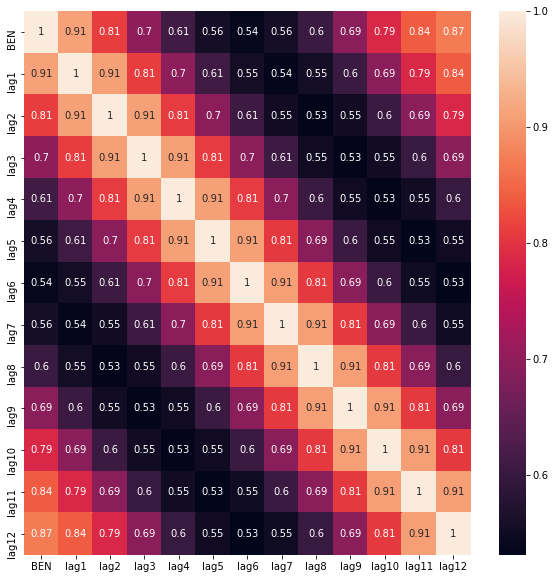

In [38]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(series_BE.corr(),
           annot = True);

In [57]:
X = plt_monthly['BEN'].values
train = X[:228]
test = X[228:]
train.shape
X.shape

(238,)

In [86]:
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

model = auto_arima(train,
                    start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    m = 12,
                    trace=True,
                    stepwise=True,
                  random_state=42,
                  sesionality = True)

print(model.aic())

predictions = model.predict(10)
print("mean_squared_error:", mean_squared_error(test, predictions))
print("root_mean_squared_error:", np.sqrt(mean_squared_error(test, predictions)))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=115.788, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=197.170, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=166.492, Time=0.17 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=185.003, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=195.584, Time=0.01 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=186.447, Time=0.26 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=143.423, Time=0.81 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=128.767, Time=1.19 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=117.461, Time=1.82 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=201.102, Time=0.13 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=157.289, Time=0.80 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=130.389, Time=0.83 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=130.064, Time=1.88 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=130.204, Time=0.47 sec
 ARIMA(1,1,0)(1,0,1)[12] intercep

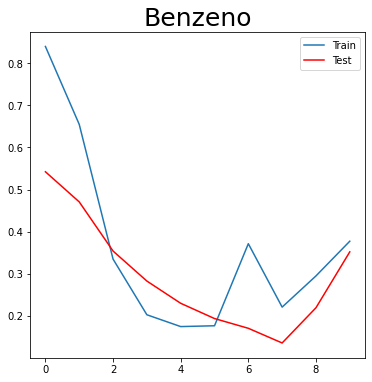

In [90]:
plt.plot(test)
plt.plot(predictions,color='red')
plt.legend(['Train', 'Test'])
plt.title('Benzeno', fontsize=25)

plt.savefig('benzeno_predict_01_20.png')

In [14]:
plt_monthly['BEN'].describe()

count    238.000000
mean       1.095355
std        0.870591
min        0.174731
25%        0.524543
50%        0.820446
75%        1.327900
max        5.954456
Name: BEN, dtype: float64

In [ ]:
exogenous = monthly_df2[['NO_2']][:228].values.reshape(-1,1)

In [76]:

model = auto_arima(train,
                    start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    m = 12,
                    trace=True,
                    stepwise=True,
                   random_state=42,
                   sesionality = True,
                   exogenous= exogenous)

print(model.summary())

print(model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=31.518, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=65.583, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=34.158, Time=0.56 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=46.918, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=64.144, Time=0.06 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=48.668, Time=0.55 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=36.016, Time=0.59 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=30.461, Time=1.85 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=28.655, Time=1.58 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=27.811, Time=1.32 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=34.214, Time=0.39 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=29.705, Time=1.70 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=30.014, Time=0.44 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=31.261, Time=0.82 sec
 ARIMA(0,1,2)(2,0,0)[12] intercept   : AIC=29.5

In [81]:
predictions_exo = model.predict(10,
                           exogenous= monthly_df2[['NO_2']][228:].values.reshape(-1,1))
print("mean_squared_error:", mean_squared_error(test, predictions))
print("root_mean_squared_error:", np.sqrt(mean_squared_error(test, predictions)))

mean_squared_error: 0.010671676167662274
root_mean_squared_error: 0.1033038051944955


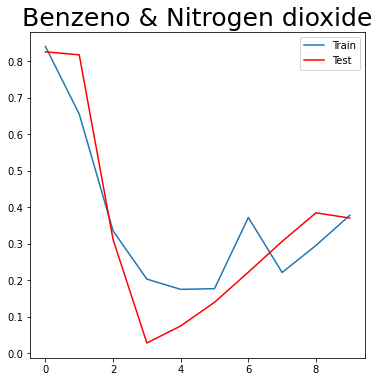

In [92]:
plt.plot(test)
plt.plot(predictions_exo,color='red')
plt.legend(['Train', 'Test'])
plt.title('Benzeno & Nitrogen dioxide', fontsize=25)
plt.savefig('benzeno_exopredicts_01_20.png');

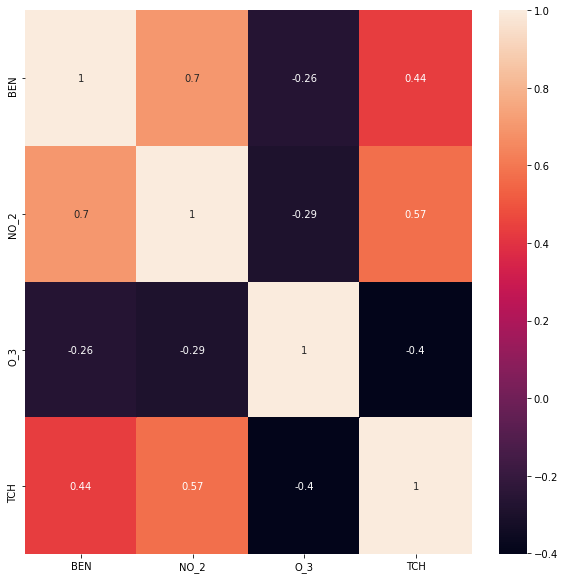

In [88]:
plt.figure(figsize=(10,10))
sns.heatmap(monthly_df2.corr(),
           annot = True)
plt.savefig('corr_heatmap_from_01_20.png');

In [72]:
monthly_df2['NO_2'].shape

(238,)